Find ETF Bond funds that move counter to SPY

In [359]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [360]:
df_ETFs = local_csv('ETFs.csv')
df_ETFs = df_ETFs.set_index('Symbol')
df_ETFs[:2]

,ETF Name,Tracks This Index,Index Description,Category,Provider,Expense Ratio,Dividend,Div Yield,Market Cap (millions),Shares (millions),...,Beta,Asset Class,Asset Class Size,Asset Class Style,Region,Sector,Leveraged,Inverse,Top Holdings,Chart
Symbol,,,,,,,,,,,,,,,,,,,,,
AAXJ,iShares MSCI All Country Asia ex Japan Index Fund,MSCI All Country Asia ex Japan Index,The index measures the performance of 11 devel...,Asia Pacific Equities,iShares,0.7400%,$0.36,1.8400%,"$1,687.89",31,...,1,Equity,NaN,NaN,Pacific ex-Japan,NaN,NaN,NaN,click,click
ACWI,MSCI All Country World Index Fund,MSCI All Country World Index,The Index is designed to measure the performan...,Global Equities,iShares,0.3500%,$0.36,1.4100%,"$1,176.64",30,...,1,Equity,Large-Cap,Blend,Global/Multi-Region,NaN,NaN,NaN,click,click


In [361]:
df_ETFs.Category.unique()

array(['Asia Pacific Equities', 'Global Equities',
       'Foreign Large Cap Equities', 'Emerging Markets Equities',
       'Europe Equities', 'Inverse Commodities', 'Leveraged Commodities',
       'Agricultural Commodities', 'Total Bond Market', 'Government Bonds',
       'Hedge Fund', 'Energy Equities', 'Diversified Portfolio',
       'Commodities', 'Financials Equities', 'Currency', 'National Munis',
       'Health & Biotech Equities', 'Metals', 'Technology Equities',
       'Leveraged Equities', 'Money Market',
       'Miscellaneous Sector Equities', 'Latin America Equities',
       'Small Cap Value Equities', 'Large Cap Value Equities',
       'Long-Short', 'International Government Bonds', 'Inverse Equities',
       'Corporate Bonds', 'China Equities', 'California Munis',
       'Foreign Small & Mid Cap Equities', 'Commodity Producers Equities',
       'Quantitative Methodology Indexes',
       'Preferred Stock/Convertible Bonds', 'Mid Cap Blend Equities',
       'Oil & Gas', 'Ma

In [362]:
df_ETFs.Sector.unique()

array([nan, 'Energy', 'Financial', 'Health & Biotech', 'Technology',
       'Retail & Consumer', 'Utilities', 'Industrial', 'Materials',
       'Consumer Discretionary', 'Agriculture', 'Communications',
       'Consumer Staples', 'Environmental', 'Transportation',
       'Building & Construction', 'Aerospace & Defense'], dtype=object)

In [363]:
df_ETFs['Asset Class'].unique()

array(['Equity', 'Commodity', 'Bond', 'Multi-Asset', 'Currency',
       'Real Estate', nan], dtype=object)

In [364]:
bonds = df_ETFs[df_ETFs['Asset Class'] == 'Bond']
bonds[:2]

,ETF Name,Tracks This Index,Index Description,Category,Provider,Expense Ratio,Dividend,Div Yield,Market Cap (millions),Shares (millions),...,Beta,Asset Class,Asset Class Size,Asset Class Style,Region,Sector,Leveraged,Inverse,Top Holdings,Chart
Symbol,,,,,,,,,,,,,,,,,,,,,
AGG,iShares Barclays Aggregate Bond Fund,Barclays Capital U.S. Aggregate Bond Index,The index measures the performance of the U.S....,Total Bond Market,iShares,0.2400%,$0.31,3.8500%,"$11,688.03",110,...,0,Bond,NaN,NaN,NaN,NaN,NaN,NaN,click,click
AGZ,iShares Barclays Agency Bond,Barclays Capital U.S. Agency Bond Index,The index measures the performance of the agen...,Government Bonds,iShares,0.200%,$0.17,0.2400%,$318.54,3,...,0,Bond,NaN,NaN,NaN,NaN,NaN,NaN,click,click


In [365]:
# find ETFs' with Bond in their Category
bond_cat = list(df_ETFs[df_ETFs.Category.str.contains('Bond').fillna(False)].index)
bond_cat[:2]

['AGG', 'AGZ']

In [366]:
# ETFs with Bond in title that are not a Bond in Asset Class
set(bond_cat) - set(bonds.index)

{'PFF', 'PGF', 'PGX'}

In [367]:
# apparently these are all equity
df_ETFs.ix['PGX']

ETF Name                                   PowerShares Preferred Portfolio
Tracks This Index        BofA Merrill Lynch Core Fixed Rate Preferred S...
Index Description        The Index is designed to replicate the total r...
Category                                 Preferred Stock/Convertible Bonds
Provider                                               Invesco PowerShares
Expense Ratio                                                       0.500%
Dividend                                                             $0.08
Div Yield                                                           7.100%
Market Cap (millions)                                            $1,020.21
Shares (millions)                                                       74
Avg Vol                                                            512,816
Beta                                                                     1
Asset Class                                                         Equity
Asset Class Size         

In [368]:
bonds = bonds.drop(bonds[bonds.Leveraged.notnull()].index) # 5 are leveraged
bonds = bonds.drop(bonds[bonds.Inverse.notnull()].index)
len(bonds)

95

In [369]:
bond_prices = pd.DataFrame(index=get_pricing('AGG', fields='close_price', start_date=start, end_date=end, frequency='daily').index)
non_bonds = []
for b in bonds.index:
    try:
        bond_prices[b] = get_pricing(b, fields='close_price', start_date=start, end_date=end, frequency='daily')
    except:
        non_bonds += [b]
non_bonds

['CFT', 'GLJ', 'MUAD', 'MUAE', 'MUAF', 'UBD', 'ULQ']

In [370]:
bonds = bonds.drop(non_bonds)
len(bonds)

88

In [371]:
start = pd.Timestamp('2007-03-02 00:00:00+0000', tz='UTC')
end = pd.Timestamp('2015-02-06 23:59:00+0000', tz='UTC')

In [398]:
# add spy to the price df
spy = get_pricing('SPY', fields='close_price', start_date=start, end_date=end, frequency='daily')
bond_prices['SPY'] = spy

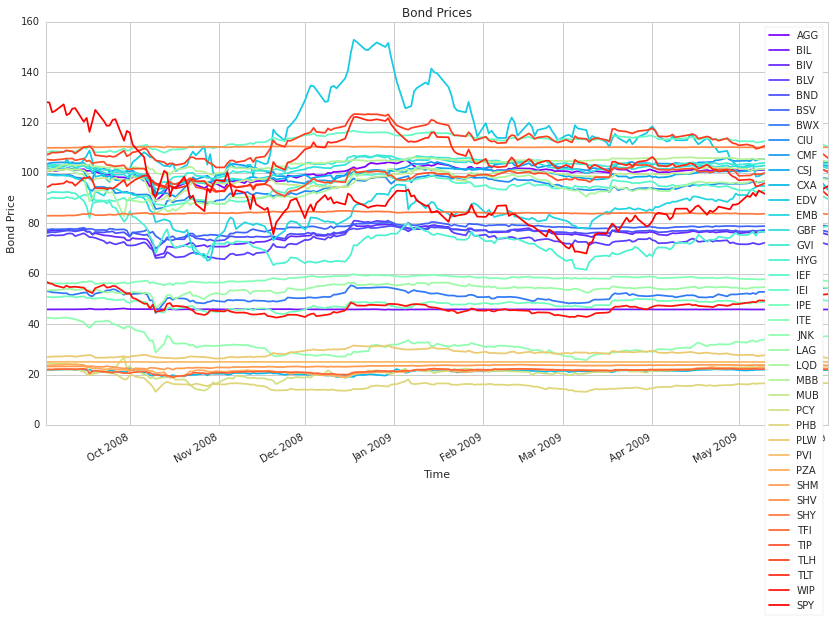

In [442]:
# plot the Bond ETF's that have data for the 2008 - 2009 stock market drop
bond_prices.ix['2008-09-01':'2009-06-01'].dropna(axis=1,how='any').plot(colormap='rainbow')
pyplot.title("Bond Prices")
#pyplot.legend(loc='best')
pyplot.ylabel("Bond Price")
pyplot.xlabel("Time")

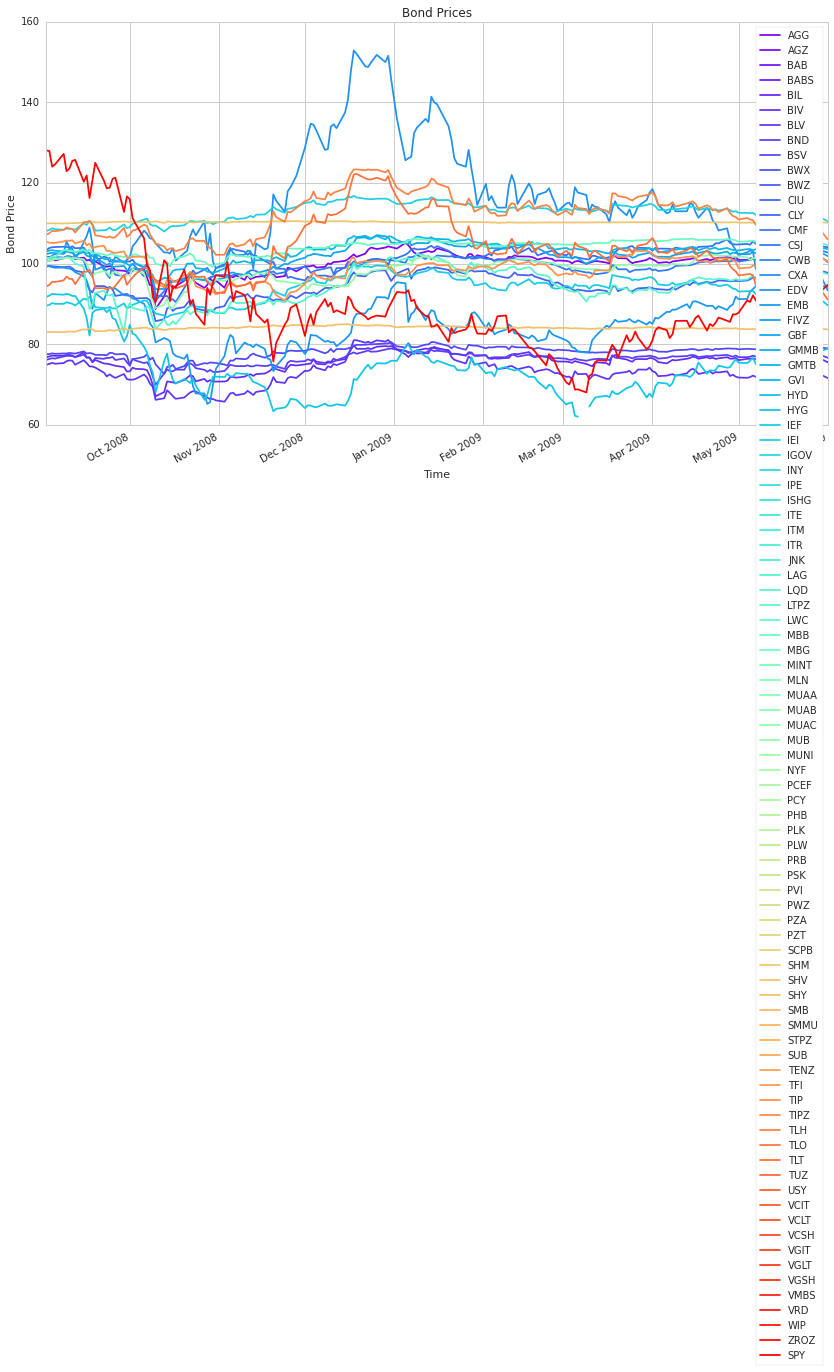

In [406]:
# plot the Bond ETF's that have a price > 62 , those below don't seem to move
bond_prices.ix['2008-09-01':'2009-06-01'][(bond_prices.ix['2008-09-01':'2009-06-01'].dropna(axis=1,how='any') > 62)].plot(colormap='rainbow')
pyplot.title("Bond Prices")
pyplot.ylabel("Bond Price")
pyplot.xlabel("Time")

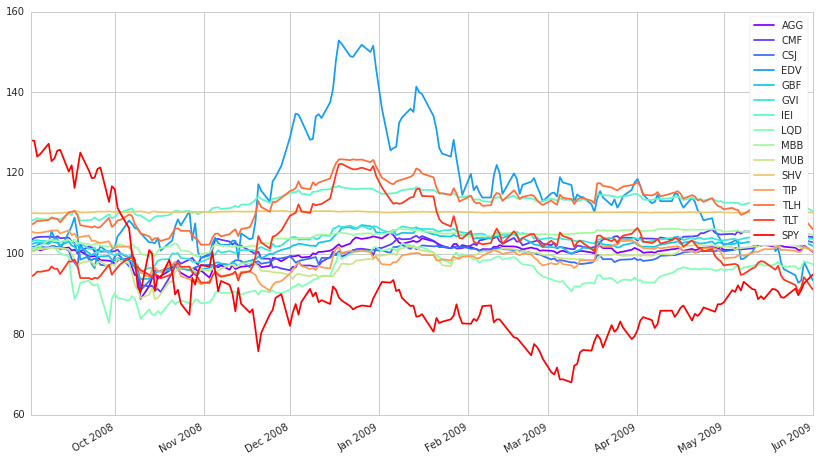

In [441]:
# plot the Bond ETF's that have a price > 62 and max > 100, they broke to the upside
bonds2 = bond_prices.ix['2008-09-01':'2009-06-01'].dropna(axis=1,how='any')
bonds2[bonds2.columns[bonds2.max() > 100]].plot(colormap='rainbow')